<div id="toc"></div>

Может быть, вы видели, как в споре на околомедицинские темы собеседники обмениваются ссылками на Пабмед, не всегда утруждая себя ознакомлением хотя бы с абстрактами исследований. Забавно, что обычно такой подход себя оправдывает, ведь мало кто станет утруждать себя поиском и чтением полного текста публикаций; одно только наличие ссылки на некую работу может поколебать уверенность оппонента в своей правоте. Но, как вы понимаете, сама по себе ссылка на исследование не является полноценным аргументом; всегда стоит обратить внимание на то, как были собраны и обработаны данные. Для этого не нужно профессионально разбираться в статистике, достаточно знать основы. Кроме того, эти основы пригодятся, если вы соберетесь публиковать собственное исследование. <br>
Сразу скажем, что весьма полезно (хотя и не обязательно) уметь использовать специальные инструменты для работы с данными. Это могут быть как языки программирования (R, Python), так и специальные программы вроде Excel или SPSS.  В этой статье расчеты и построение графиков выполнены на Питоне. Если нажмете на эту кнопку, то увидите версию статьи с кодом:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
from  scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()">\
<input type="submit" value="Показать/скрыть код."></form>''')#

### Выборка и генеральная совокупность

Должен ли повар, который варит кашу, съесть всю кастрюлю, чтобы оценить плод своих кулинарных усилий? Вероятно, нет: он может попробовать чуть-чуть, исходя из того простого соображения, что остальная каша в кастрюле похожа на ту, что оказалась в его ложке. В повседневной жизни мы постоянно экстраполируем представление о части на целое. Возможно, вы любите мандарины, но чтобы это понять, вам не пришлось съесть все мандарины на свете. 

Множество объектов, о котором исследователь собирается делать выводы, называется генеральной совокупностью. Например, это могут быть все люди, страдающие диабетом. Или все женщины старше 65, перенесшие инсульт. Или все мандарины на свете. Собрать информацию обо всех объектах обычно невозможно, так что используются выборки. Выборка &mdash; это та часть генеральной совокупности, с которой работает исследователь. Если выборка отражает изучаемые свойства генеральной совокупности, она называется репрезентативной, а если не отражает, то нерепрезентативной (вряд ли пакет гнилых мандаринов убедит вас, что все мандарины на свете плохи на вкус, но не всегда нерепрезентативность выборки так очевидна). 

Эталонный пример работы с нерепрезентативной выборкой &mdash; опрос, проведенный в 1936 году журналом "The Literary Digest": были разосланы бюллетени десяти миллионам человек, среди которых были подписчики журнала и люди, случайным образом выбранные из телефонных справочников и реестров владельцев автомобилей. Два с половиной миллиона человек вернули их заполненными, и большинство из них &mdash; 57% &mdash; в этом опросе поддерживали республиканца Альфа Лэндона. Демократ Франклин Рузвельт набрал 40%, но когда дело дошло до выборов, &mdash; победил. Позже стало понятно, почему так произошло: во-первых, большая часть подписчиков журнала были республиканцами, а во-вторых, телефонами и автомобилями владели более-менее состоятельные люди, которые тоже в основном были республиканцами. 

### Описательная статистика

#### Гистограмма

Первым делом нужно составить представление о выборке и описать ее. Наиболее удобное графическое представление выборки &mdash; гистограмма. Чтобы понять, как устроена гистограмма, возьмем для примера таблицу с данными из знаменитого исследования 1885 года английского ученого Френсиса Гальтона, в котором он изучал взаимосвязь между ростом взрослых людей и ростом их родителей. В таблицу вошли данные о росте детей (то есть уже взрослых людей) и их родителей из 197 семей. Давайте разберемся с ростом детей. 

In [3]:
galton = pd.read_csv('Galton.csv')
galton.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


Посмотрите на графики внизу. Все эти четыре графика &mdash; гистограммы, построенные по выборке Гальтона. По оси  $x$ отложена высота в дюймах, по оси $y$ &mdash; количество людей. Первый график сделан так: мы разбили ось $x$ на два интервала: меньше 67 и больше 67. А потом над каждым интервалом нарисовали прямоугольник, высота которого по оси $y$ соответствует количеству людей с таким ростом. Если бы было одинаковое количество людей с ростом меньше 67 и больше 67, прямоугольники были бы одинаковы. Но слева прямоугольник немного выше, потому что людей ниже 67 дюймов в выборке больше. На втором графике мы разбили ось $x$ уже на 5 интервалов, и над каждым построили прямоугольник соответствующей количеству людей в этом интервале высоты. На третьем рисунке интервалов уже 12, а на 4 &mdash; 40. Вы, наверное, уже поняли, что как недостаточная, так и избыточная точность мешают восприятию гистограммы.

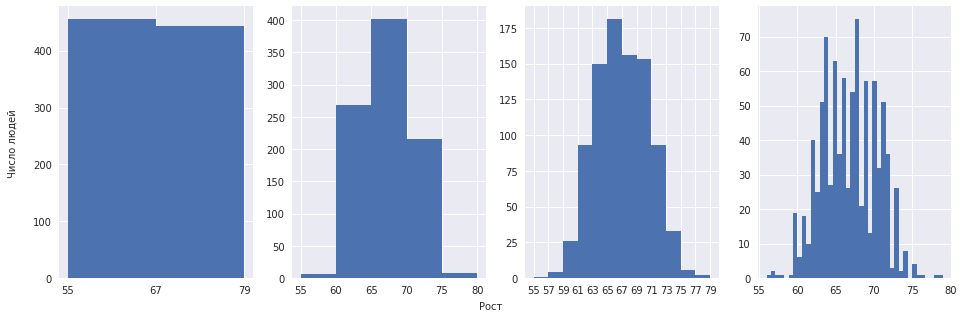

In [4]:
fig = plt.figure(figsize=(16, 5))
fig.text(0.5, 0.04, "Рост", ha='center')
fig.text(0.08, 0.5, "Число людей", va='center', rotation='vertical')
ax = fig.add_subplot(141)
galton.Height.hist(bins=range(55, 81, 12))
plt.xticks(range(55, 81, 12))
ax = fig.add_subplot(142)
galton.Height.hist(bins=range(55, 81, 5))
plt.xticks(range(55, 81, 5))
ax = fig.add_subplot(143)
galton.Height.hist(bins=range(55, 81, 2))
plt.xticks(range(55, 81, 2))
ax = fig.add_subplot(144)
galton.Height.hist(bins=40)
plt.show()

Как формально описать это распределение? <br> 
Для начала можно указать на область числовой оси, где единицы наблюдения имеют тенденцию к концентрации. А потом показать, насколько широко и симметрично они рассеиваются в стороны. Для этого используются специальные показатели, которые называются мерами центральной тенденции и мерами рассеяния. <br> 

#### Меры центральной тенденции

Вообще говоря мер центральной тенденции довольно много, но наиболее часто используются среднее арифметическое, мода и медиана, их мы и разберем. <br> 
Как найти среднее арифметическое для нашей выборки, все знают: $ \frac{1}{n} \sum_{i=1}^{n} x_{i}$ &mdash; сложить рост всех людей и поделить на количество людей. <br> 
Медиану найти тоже очень просто. Для этого мы выстраиваем все элементы выборки по неубыванию (то есть по возрастанию, а одинаковые значения пусть просто стоят рядом) &mdash; получится вариационный ряд. То, что будет ровно в его центре &mdash; медиана. Например, вот вариационный ряд: $1, 2, 2, 4, 7, 8, 11$. Ровно посередине стоит число 4, оно и будет медианой. Если в вариационном ряду четное число элементов, то медианой будет среднее арифметическое двух чисел, которые стоят посередине. Скажем, в вариационном ряду: $2, 2, 2, 3, 3, 3$ &mdash; медиана равна 2,5. Ничего сложного. Однако если в выборке много единиц наблюдения, быстро найти ее середину бывает проблематично. Порядковый номер медианы в вариационном ряду можно быстро определить вот так: $i_{mdn} = \frac{n+1}{2}$; для ряда с четным количеством значений результат получится дробным, например 5,5 &mdash; тогда медианой будет среднее арифметическое 5 и 6 значений. <br>
Осталась мода. А мода это самое часто встречающееся в выборке значение. Она интересует нас меньше, поскольку обычно является наименее информативным показателем из трех (при работе с непрерывными данными, особенно если значения в выборке довольно точные, &mdash; скажем, пара знаков после запятой, &mdash; часто оказывается, что моды нет вообще или она совершенно непоказательна). 

Если среднее арифметическое и медиана примерно равны, а гистограмма симметрична и напоминает колокол, то такое распределение называют нормальным. Если один бок колокола становится более пологим, чем другой, распределение называют скошенным. На этом рисунке первое распределение &mdash; нормальное, а остальные &mdash; все более скошенные.

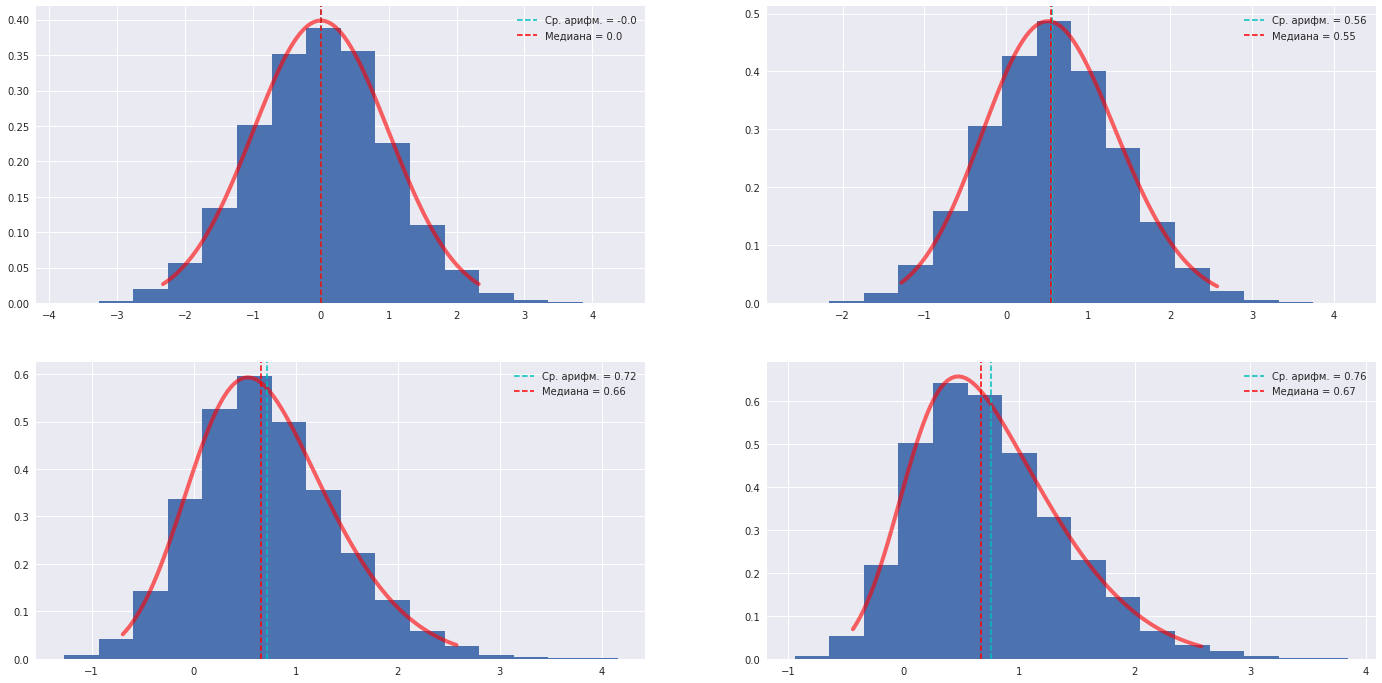

In [6]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize=(24, 12))
for i in range(0, 4):
    fig.add_subplot(2, 2, i+1)
    sample = stats.skewnorm.rvs(i, size=10000)
    x = np.linspace(stats.skewnorm.ppf(0.01, i), stats.skewnorm.ppf(0.99, i), 100)
    plt.plot(x, stats.skewnorm.pdf(x, i), 'r-', lw=4, alpha=0.6)
    plt.hist(sample, 16, normed=True)
    line1 = plt.axvline(np.mean(sample), label=('Ср. арифм. = '+str(round(np.mean(sample), 2))), color='c', linestyle='dashed', linewidth=1.5)
    line2 = plt.axvline(np.median(sample), label = ('Медиана = '+str(round(np.median(sample), 2))), color='r', linestyle='dashed', linewidth=1.5)
    plt.legend(handles=[line1, line2])
plt.show()

#### Меры рассеяния

С основными мерами центральной тенденции &mdash; медианой, модой и средним арифметическим &mdash; мы разобрались. Теперь посмотрим на меры рассеяния. Нужны они, повторюсь, затем, чтобы описать, насколько сильно данные рассеяны вдоль оси $x$. Сравните две гистограммы (обратите внимание, что ось $x$ имеет одинаковый масштаб на обоих):

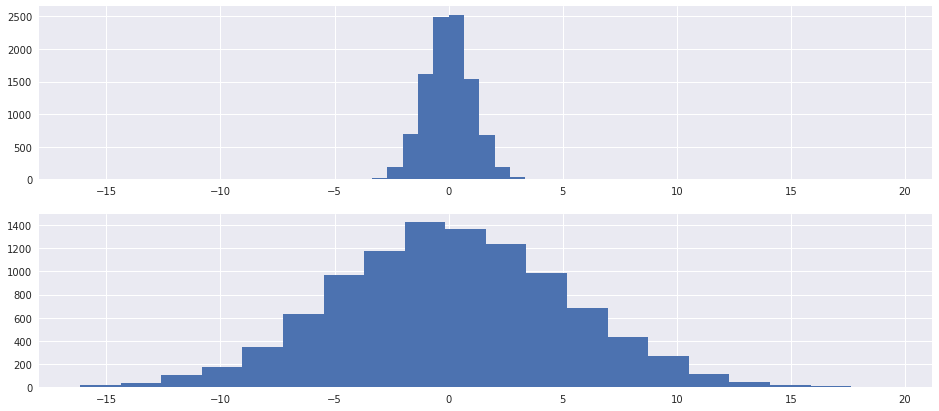

In [7]:
norm_rv1 = stats.norm(loc=0, scale = 1)
norm_rv2 = stats.norm(loc=0, scale = 5)
sample_norm1 = norm_rv1.rvs(size=10000)
sample_norm2 = norm_rv2.rvs(size=10000)
fig = plt.figure(figsize=(16, 7))
ax1 = plt.subplot(211)
plt.hist(sample_norm1, 12)
ax2 = plt.subplot(212, sharex=ax1)
plt.hist(sample_norm2, 20)
plt.show()

Как видите, в обоих случаях данные распределены вдоль оси $x$ вокруг нуля, но вариабельность значений второй выборки выше. Там, очевидно, есть и объекты со значениями меньше -10 и больше 10, а в первой выборке таких нет вовсе, посмотрите на гистограмму. 

Для описания рассеивания значений в симметричных колоколообразных распределениях чаще всего используют среднеквадратическое отклонение, обозначается оно буквой $\sigma$ (сигма). Для первой выборки $\sigma = 1$, а для второй выборки $\sigma = 5$, поэтому вторая гистограмма шире. Чем больше среднеквадратическое отклонение, тем сильнее данные распростираются в стороны от медианы и среднего арифметического. Но не стоит судить об этом показателе по внешнему виду гистограммы. На следующем рисунке две гистограммы одной и той же выборки, просто сделанные с разным масштабом. Обратите внимание на значения на оси $x$.

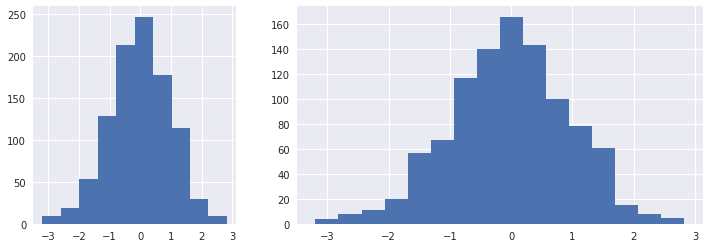

In [51]:
from matplotlib import gridspec
fig = plt.figure(figsize=(12, 4))
gs = gridspec.GridSpec(1, 2, width_ratios=[1.5, 3])
sample_norm = np.random.randn(1000)
ax1 = fig.add_subplot(gs[0])
plt.hist(sample_norm)
plt.xticks(range(-3, 4))
ax2 = fig.add_subplot(gs[1])
plt.hist(sample_norm, bins=16)
plt.show()

Считается среднеквадратическое отклонение по вот такой формуле: $\sigma = \sqrt{\frac{\sum_{i=1}^n (x_i - \overline{x})^2}{n}}$ &mdash; на первый взгляд выглядит пугающе, но все очень просто. Смотрите на рисунок:

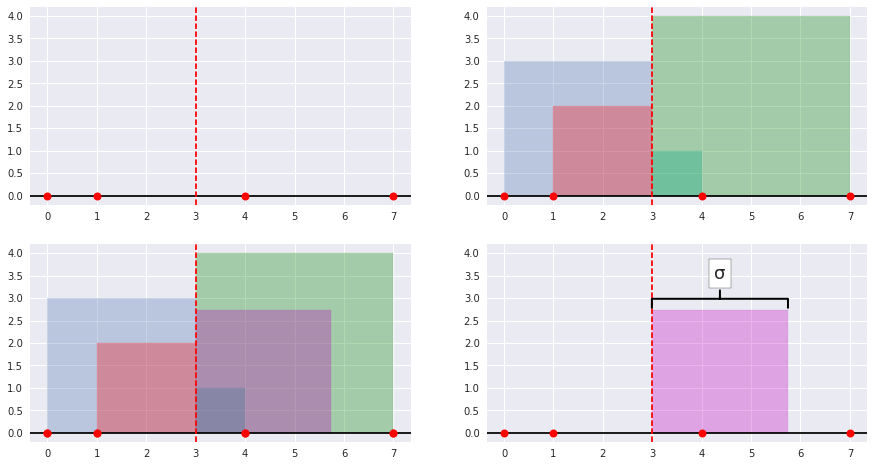

In [8]:
a, b, c, d = 0, 1, 4, 7
mean = (a+b+c+d)/4
alpha=0.3

fig = plt.figure(figsize=(15, 8))
ax1 = fig.add_subplot(222)
plt.axhline(0., color='k')
plt.axvline(mean, color='r', linestyle='dashed')
ax1.add_patch(
    patches.Rectangle(
        (a, 0.),         # (x,y)
        mean-a,          # ширина
        mean-a,          # высота
    alpha=alpha)
)
ax1.add_patch(patches.Rectangle((b, 0.), mean-b, mean-b, alpha=alpha, color='r'))
ax1.add_patch(patches.Rectangle((mean, 0.), c-mean, c-mean, alpha=alpha, color='c'))
ax1.add_patch(patches.Rectangle((mean, 0.), d-mean, d-mean, alpha=alpha, color='g'))
ax1.plot([a, b, c, d], [0, 0, 0, 0], ls='', marker='o', ms=8, mfc='r')

ax2 = fig.add_subplot(221, sharey=ax1)
plt.axhline(0., color='k')
plt.axvline(mean, color='r', linestyle='dashed')
plt.plot([a, b, c, d], [0, 0, 0, 0], ls='', marker='o', ms=8, mfc='r')

ax3 = fig.add_subplot(223)
sigma = np.std(np.array([a, b, c, d]))
plt.axhline(0., color='k')
plt.axvline(mean, color='r', linestyle='dashed')
plt.plot([a, b, c, d], [0, 0, 0, 0], ls='', marker='o', ms=8, mfc='r')
ax3.add_patch(patches.Rectangle((a, 0.), mean-a, mean-a, alpha=alpha))
ax3.add_patch(patches.Rectangle((b, 0.), mean-b, mean-b, alpha=alpha, color='r'))
ax3.add_patch(patches.Rectangle((mean, 0.), c-mean, c-mean, alpha=alpha, color='c'))
ax3.add_patch(patches.Rectangle((mean, 0.), d-mean, d-mean, alpha=alpha, color='g'))
ax3.add_patch(patches.Rectangle((mean, 0.), sigma, sigma, alpha=alpha, color='m'))
ax3.plot([a, b, c, d], [0, 0, 0, 0], ls='', marker='o', ms=8, mfc='r')

ax4 = fig.add_subplot(224, sharey=ax3)
plt.axhline(0., color='k')
plt.axvline(mean, color='r', linestyle='dashed')
plt.plot([a, b, c, d], [0, 0, 0, 0], ls='', marker='o', ms=8, mfc='r')
ax4.add_patch(patches.Rectangle((mean, 0.), sigma, sigma, alpha=alpha, color='m'))
ax4.annotate('σ', xy=((mean+(mean+sigma))/2, sigma+0.2), \
            xytext=((mean+(mean+sigma))/2, sigma+0.6), xycoords='data', 
            fontsize=18, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=3.78, lengthB=0.5', lw=2.0))
plt.show()

Давайте сделаем все буквально по формуле. Возьмем для наглядной иллюстрации выборку из четырех элементов: $0, 1, 4, 7$. Среднее арифметическое этой выборки равно 3. Покажем это на первом графике: на оси $x$ красными точками отмечены элементы нашей выборки, а вертикальная штриховая линия &mdash; среднее арифметическое. <br>
Каждый элемент выборки отклоняется от среднего на некоторое расстояние. Например, 0 отклоняется от среднего на 3, а 1 отклоняется от среднего на 2. На втором рисунке мы достроили эти отклонения до квадратов. Вот смотрите, у зеленого квадрата сторона равна 4, потому что 7 отклоняется от среднего на 4. <br>
На третьем рисунке появился сиреневый квадрат. Получился он так: мы просто нашли среднюю площадь первых четырех квадратов и построили пятый с такой площадью. <br>
На четвертом рисунке видно, что сторона сиреневого квадрата равна среднеквадратическому отклонению. <br> 
Итак, стандартное отклонение &mdash; это среднее арифметическое квадратов абсолютных отклонений от выборочного среднего. 

При этом, кстати говоря, площадь сиреневого квадрата является еще одной мерой рассеяния, дисперсией (среднее арифметическое квадратов отклонений от выборочного среднего). Поэтому вряд ли вас удивит, что обозначают дисперсию обычно вот так: $\sigma^2$, а высчитывается она следущим образом:  $\sigma^2=\frac{\sum_{i=1}^n (x_i - \overline{x})^2}{n}$ &mdash; ровно так же, как среднеквадратическое отклонение, только без корня.

Еще одна мера рассеяния &mdash; коэффициент вариации. Собственно, это то же самое среднеквадратическое отклонение, только выраженное в процентах от выборочного среднего. То есть чтобы его найти, нужно разделить $\sigma$ на среднее и умножить на 100%. Коэффициент вариации удобно использовать для сравнения рассеяний разных выборок, ведь он, повторюсь, выражается в процентах. 

Любопытная деталь, связанная с дисперсией и среднеквадратическим отклонением: посчитанные по выборке, они обычно немного меньше, чем в генеральной совокупности. И чем выборка меньше, тем хуже она отражает истинный разброс значений. Чтобы получить представление об этих показателях для генеральной совокупности, применяют так называемую поправку Бесселя. Она очень проста и представляет собой единицу с минусом в знаменателях обеих формул. То есть для оценки дисперсии и среднеквадратического отклонения в генеральной совокупности формулы станут вот такими: <br>
$s = \sqrt{\frac{\sum_{i=1}^n (x_i - \overline{x})^2}{n-1}}$, $\sigma^2=\frac{\sum_{i=1}^n (x_i - \overline{x})^2}{n-1}$ <br>
Ряд авторов считают, что так и только так посчитанное среднеквадратическое отклонение можно называть стандартным отклонением, но все остальные используют эти термины как синонимы и прекрасно себя чувствуют. Так что дальше я буду писать "стандартное отклонение", подразумевая при этом, что поправки Бесселя нет. 

Еще одна занятная и важная деталь, связанная со стандартным отклонением, заключается в том, что для нормального распределения выполняется следующее правило: 68,27% единиц наблюдения попадают в интервал от $-1\sigma$ до $1\sigma$; 95,45% единиц наблюдения попадают в интервал от $-2\sigma$ до $2\sigma$; 99,7% единиц наблюдения попадают в интервал от $-3\sigma$ до $3\sigma$. Правило называется, соответсвенно, правилом 68-95-99,7. Эти значения можно запомнить. Но можно и не запоминать. 

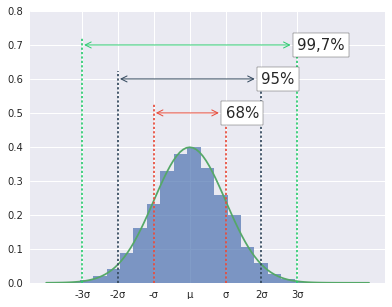

In [52]:
norm_rv = stats.norm(loc=0, scale = 1) #Вот у меня нормально распределенная величина
sample_norm = norm_rv.rvs(size=10000)
fig = plt.figure(figsize=(14, 5))
ax = fig.add_subplot(121)
x = np.linspace(-4,5,100)
pdf = norm_rv.pdf(x)
xticks = [-3, -2, -1, 0, 1, 2, 3]
xticks_s = ['-3σ', '-2σ', '-σ', 'μ', 'σ', '2σ', '3σ']
plt.xticks(xticks, xticks_s)
plt.ylim(0, 0.8)
plt.hist(sample_norm, normed=True, bins = 20, alpha=0.7)
plt.plot(x, pdf)
for i in [-3, 3]: plt.axvline(i, ls='dotted', c='#2ecc71', ymax=0.9)
for i in [-2, 2]: plt.axvline(i, ls='dotted', c="#34495e", ymax=0.78)
for i in [-1, 1]: plt.axvline(i, ls='dotted', c="#e74c3c", ymax=0.66)
ax.annotate('68%', xy=(-1, 0.5), \
            xytext=(1, 0.5), xycoords='data', 
            fontsize=15, ha='left', va='center',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='<->, head_length=0.4,head_width=0.2', lw=1.0, color="#e74c3c"))
ax.annotate('95%', xy=(-2, 0.6), \
            xytext=(2, 0.6), xycoords='data', 
            fontsize=15, ha='left', va='center',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='<->, head_length=0.4,head_width=0.2', lw=1.0, color="#34495e"))
ax.annotate('99,7%', xy=(-3, 0.7), \
            xytext=(3, 0.7), xycoords='data', 
            fontsize=15, ha='left', va='center',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='<->, head_length=0.4,head_width=0.2', lw=1.0, color='#2ecc71'))
plt.show()

Итак, для описания нормального распределения удобно указать среднее арифметическое и стандартное отклонение. Но для описания распределений, которые не похожи на нормальное, применять стандартное отклонение нельзя, ведь оно не отражает асимметрию. Для этого можно использовать квартили.  

Как вы помните, если взять выборку и выстроить ее по возрастанию (как вы помните, это называется вариационным рядом), а потом ровно посередине провести линию, эта линия будет медианой. <br> 
Если взять левую половину и провести для нее персональную медиану, получившаяся линия будет первым квартилем. <br>
Если взять правую половину и тоже провести для нее персональную медиану, эта линия будет третьим квартилем. <br>
Медиана, соответственно, является вторым квартилем.<br>
Иными словами, квартили &mdash; это значения, которые делят вариационный ряд на четыре части. Расстояние между первым и третьим квартилями называется интерквартильным размахом &mdash; это еще одна мера рассеяния. <br>
Помимо квартилей, есть еще и процентили, только они дробят вариационный ряд на сто кусков. Первый квартиль это то же самое, что 25-й процентиль, а третий квартиль это то же самое, что 75-й процентиль. 
Квартили и процентили это разновидности квантилей &mdash; значений, которые дробят вариационный ряд на некоторое количество частей. Но об обстальных знать не обязательно. 

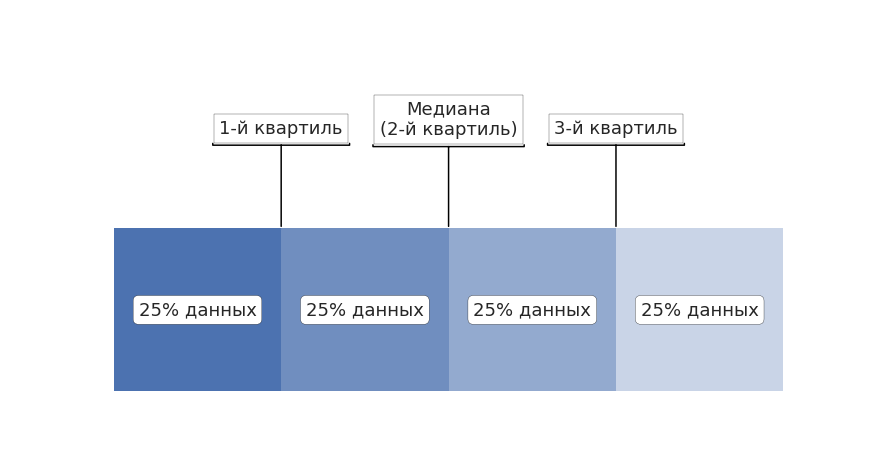

In [88]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)
for p in [
    patches.Rectangle(
        (0.1, 0.1), 0.2, 0.3,
        alpha=None,
    ),
    patches.Rectangle(
        (0.3, 0.1), 0.2, 0.3,
        alpha=0.8, contains='lol'
    ),
    patches.Rectangle(
        (0.5, 0.1), 0.2, 0.3,
        alpha=0.6
    ),
    patches.Rectangle(
        (0.7, 0.1), 0.2, 0.3,
        alpha=0.3, label='lol'
    ),
]:
    ax.add_patch(p)
    
    
for x in range(0, 8, 2):
    ax.annotate('25% данных', xy=(0.2+x/10, 0.25), \
            xytext=(0.2+x/10, 0.25), xycoords='data', 
            fontsize=18, ha='center', va='center',
            bbox=dict(boxstyle='round', fc='white'))
ax.annotate('Медиана\n(2-й квартиль)', xy=(0.5, 0.4), \
        xytext=(0.5, 0.6), xycoords='data', 
            fontsize=18, ha='center', va='center',
            bbox=dict(boxstyle='square', pad=0.3, fc='white'),
            arrowprops=dict(arrowstyle=']-, widthA=4.2, lengthA=0.1', lw=1.5))
ax.annotate('1-й квартиль', xy=(0.3, 0.4), \
        xytext=(0.3, 0.6), xycoords='data', 
            fontsize=18, ha='center', va='top',
            bbox=dict(boxstyle='square', pad=0.3, fc='white'),
            arrowprops=dict(arrowstyle=']-, widthA=3.8, lengthA=0.1', lw=1.5))
ax.annotate('3-й квартиль', xy=(0.7, 0.4), \
        xytext=(0.7, 0.6), xycoords='data', 
            fontsize=18, ha='center', va='top',
            bbox=dict(boxstyle='square', pad=0.3, fc='white'),
            arrowprops=dict(arrowstyle=']-, widthA=3.8, lengthA=0.1', lw=1.5))
plt.ylim(0, 0.8)
plt.axis('off')
plt.show()

Давайте посмотрим, как квартили выглядят на скошенной гистограмме. Мы ожидаем, что первый и третий квартили будут на разном расстоянии от медианы, ведь именно эта фишка и заставляет нас их использовать. 

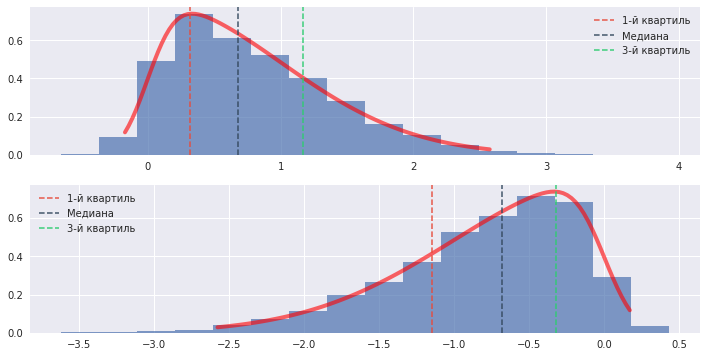

In [11]:
plt.figure(figsize=(12, 6))
plt.subplot(211)
i = 6
sample = stats.skewnorm.rvs(i, size=10000)
x = np.linspace(stats.skewnorm.ppf(0.01, i), stats.skewnorm.ppf(0.99, i), 100)
plt.plot(x, stats.skewnorm.pdf(x, i), 'r-', lw=4, alpha=0.6)
plt.hist(sample, 16, normed=True, alpha=0.7)
l1 = plt.axvline(np.percentile(sample, 25), c="#e74c3c", alpha=0.8, linestyle='dashed', label='1-й квартиль')
l2 = plt.axvline(np.percentile(sample, 50), c="#34495e", alpha=0.8, linestyle='dashed', label='Медиана')
l3 = plt.axvline(np.percentile(sample, 75), c="#2ecc71", alpha=0.8, linestyle='dashed', label='3-й квартиль')
plt.legend(handles=[l1, l2, l3])
plt.subplot(212)
i = -6
sample = stats.skewnorm.rvs(i, size=10000)
x = np.linspace(stats.skewnorm.ppf(0.01, i), stats.skewnorm.ppf(0.99, i), 100)
plt.plot(x, stats.skewnorm.pdf(x, i), 'r-', lw=4, alpha=0.6)
plt.hist(sample, 16, normed=True, alpha=0.7)
l1 = plt.axvline(np.percentile(sample, 25), c="#e74c3c", alpha=0.8, linestyle='dashed', label='1-й квартиль')
l2 = plt.axvline(np.percentile(sample, 50), c="#34495e", alpha=0.8, linestyle='dashed', label='Медиана')
l3 = plt.axvline(np.percentile(sample, 75), c="#2ecc71", alpha=0.8, linestyle='dashed', label='3-й квартиль')
plt.legend(handles=[l1, l2, l3])
plt.show()

Смотрите, в первом случае правый склон гистограммы более пологий, и третий квартиль дальше от медианы, чем первый. Во втором случае первый квартиль дальше от медианы, чем первый, и у гистограммы более пологий левый склон. 

#### Ящик с усами

Есть один наигоднейший график, очень удобный для того, чтобы на глаз оценить, насколько симметрично распределение, высока ли вариабельность значений, где начинаются и кончаются данные, есть ли выбросы. Называется он ящиком с усами, или диаграммой размаха, или ящичковой диаграммой Тьюки. <br>
Выглядят ящики с усами вот так:

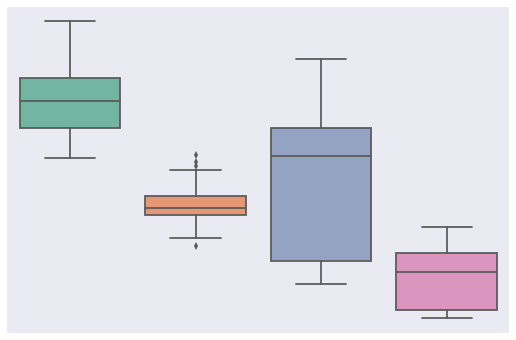

In [31]:
plt.figure(figsize=(9, 6))
iris = sns.load_dataset("iris")
ax = sns.boxplot(data=iris, orient="v", palette="Set2")
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

Ориентированы ящики могут быть как горизонтально, так и вертикально, на усмотрение исследователя. Суть их при этом не меняется. 

Устроены эти диаграммы довольно незатейливо. Границы самого ящика показывают первый и третий квартили, линия в центре &mdash; медиана. Усы показывают, где начинаются и кончаются данные. Если данные отстоят в меньшую сторону от первого квартиля или в большую от третьего на расстояние больше полутора интерквартильных размахов (расстояние между 1-м и 3-м квартилями), то эти данные считаются выбросами и изображаются в виде точек. <br>
Если вы забыли, что такое выброс, представьте себе, что в вашу выборку, по которой вы собрались делать выводы о среднем росте в популяции, затесался карлик. Или великан. Если выборка небольшая, присутствие необычно выдающихся объектов сильно сместит среднее арифметическое, так что в некоторых случаях от выбросов стоит избавляться (то есть просто исключить из выборки, ничего больше). 

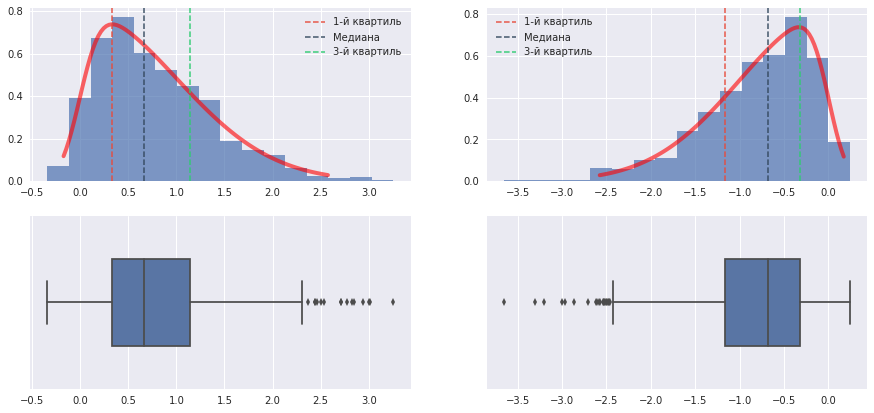

In [54]:
plt.figure(figsize=(15, 7))
plt.subplot(221)
i = 6
sample = stats.skewnorm.rvs(i, size=1000)
x = np.linspace(stats.skewnorm.ppf(0.01, i), stats.skewnorm.ppf(0.99, i), 100)
plt.plot(x, stats.skewnorm.pdf(x, i), 'r-', lw=4, alpha=0.6)
plt.hist(sample, 16, normed=True, alpha=0.7)
l1 = plt.axvline(np.percentile(sample, 25), c="#e74c3c", alpha=0.8, linestyle='dashed', label='1-й квартиль')
l2 = plt.axvline(np.percentile(sample, 50), c="#34495e", alpha=0.8, linestyle='dashed', label='Медиана')
l3 = plt.axvline(np.percentile(sample, 75), c="#2ecc71", alpha=0.8, linestyle='dashed', label='3-й квартиль')
plt.legend(handles=[l1, l2, l3])
plt.subplot(223)
sns.boxplot(sample, width=0.5)
plt.subplot(222)
i = -6
sample = stats.skewnorm.rvs(i, size=1000)
x = np.linspace(stats.skewnorm.ppf(0.01, i), stats.skewnorm.ppf(0.99, i), 100)
plt.plot(x, stats.skewnorm.pdf(x, i), 'r-', lw=4, alpha=0.6)
plt.hist(sample, 16, normed=True, alpha=0.7)
l1 = plt.axvline(np.percentile(sample, 25), c="#e74c3c", alpha=0.8, linestyle='dashed', label='1-й квартиль')
l2 = plt.axvline(np.percentile(sample, 50), c="#34495e", alpha=0.8, linestyle='dashed', label='Медиана')
l3 = plt.axvline(np.percentile(sample, 75), c="#2ecc71", alpha=0.8, linestyle='dashed', label='3-й квартиль')
plt.legend(handles=[l1, l2, l3])
plt.subplot(224)
sns.boxplot(sample, width=0.5)
plt.show()

Важно помнить, что не каждую выборку можно описать с помощью перечисленных показателей или отразить ящичковой диаграммой. Хороший тому пример &mdash; бимодальные распределения. Смотрите на картинку. 

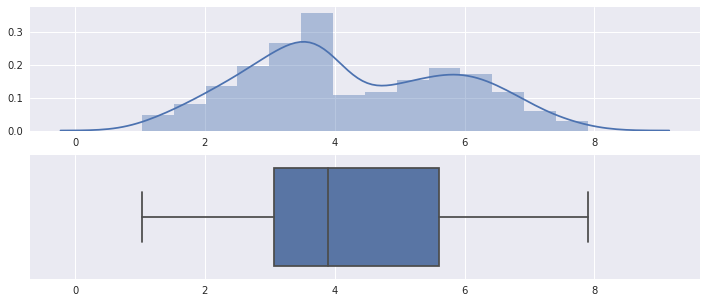

In [116]:
def bimodal( low1, high1, mode1, low2, high2, mode2 ):
    toss = np.random.choice( (1, 2) )
    if toss == 1:
        return np.random.triangular( low1, high1, mode1 ) 
    else:
        return np.random.triangular( low2, high2, mode2 )
a = []
for x in range(1000):
    a.append(bimodal(1, 4, 4, 3, 6, 8))
fig = plt.figure(figsize=(12, 5))
ax1 = plt.subplot(211)
sns.distplot(a)
ax2 = plt.subplot(212, sharex=ax1)
sns.boxplot(a)
plt.show()

В подобных случаях разумным выходом будет просто показать гистограмму. 

#### Пример описания выборки

Давайте для примера опишем мужчин и женщин из таблицы Гальтона, о которой мы говорили при обсуждении гистограмм. 

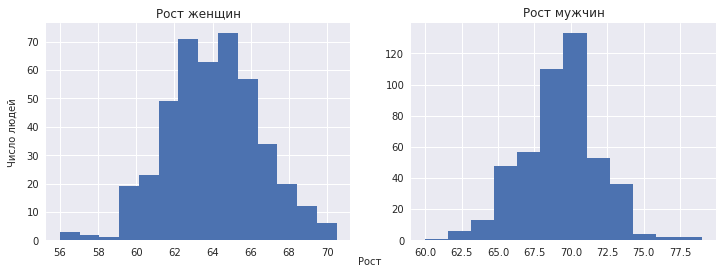

In [174]:
fig = plt.figure(figsize=(12, 4))
fig.text(0.5, 0.04, "Рост", ha='center')
fig.text(0.08, 0.5, "Число людей", va='center', rotation='vertical')
ax1 = plt.subplot(121)
galton[galton.Gender=='F'].Height.hist(bins=14)
plt.title('Рост женщин')

ax2 = plt.subplot(122)
galton[galton.Gender=='M'].Height.hist(bins=12)
plt.title('Рост мужчин')

plt.show()

Гистограмма роста женщин достаточно похожа на нормальное распределение, так что для иллюстрации опишем первую группу с помощью среднего арифметического и стандартного отклонения. Вторую  группу опишем с помощью медианы и квартилей. 

In [193]:
df = pd.DataFrame(columns=['F', 'M'], index=galton[galton.Gender=='F'].describe().index)
df['F']= galton[galton.Gender=='F'].describe().Height
df['M']= galton[galton.Gender=='M'].describe().Height
df.ix[1:]

,F,M
mean,64.110162,69.228817
std,2.370320,2.631594
min,56.000000,60.000000
25%,62.500000,67.500000
50%,64.000000,69.200000
75%,65.500000,71.000000
max,70.500000,79.000000


_Рост испытуемых женского пола варьировался в пределах от 56 до  70 дюймов, среднее арифметическое (стандартное отклонение) составило 64.1 дюйма (2.4 дюйма). <br>
Рост испытуемых мужского пола варьировался в пределах от 60 до 79 дюймов с медианой (интерквартильной широтой), равной 69.2 дюйма (от 67.5 до 71 дюйма)_

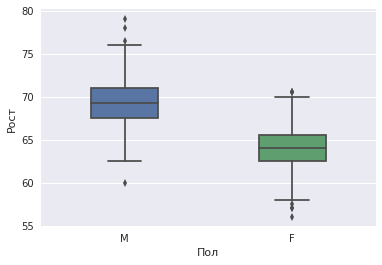

In [198]:
sns.boxplot(x=galton.Gender, y=galton.Height, data=galton, width=0.4)
plt.ylabel('Рост')
plt.xlabel('Пол')
plt.show()

Многие исследователи, чтобы обозначить среднее арифметическое и стандартное отклонение, пишут так: 64.1±2.4, но вы лучше так не делайте, потому что при таком оформлении возникает путаница между стандартным отклонением и доверительными интервалами (о доверительных интервалах скоро тоже поговорим). Лучше вообще не используйте символ "±". 

Описательная статистика перечисленными параметрами не ограничивается, но это необходимые основы, и теперь вы их знаете. 

### Центральная предельная теорема

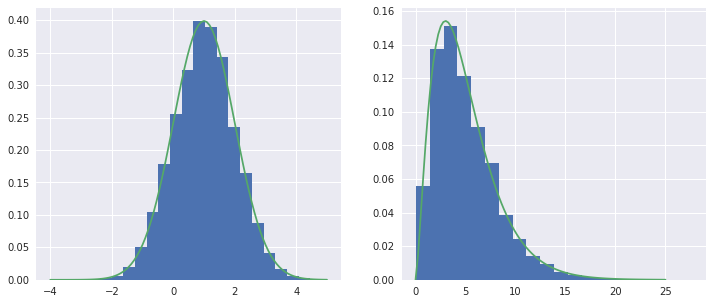

In [59]:
norm_rv = stats.norm(loc=1.0, scale = 1) #Вот у меня нормально распределенная величина
sample_norm = norm_rv.rvs(size=10000)#Вот я 1000 раз вытащил ее, получилась выборка
chi_rv = stats.chi2(5)#А вот величина с распределением хи-квадрат с 2 степенями свободы
sample_chi = chi_rv.rvs(size=10000)#Делаем выборку с 1000 единиц наблюдения
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(121)
x = np.linspace(-4,5,100)
pdf = norm_rv.pdf(x)
plt.hist(sample_norm, normed=True, bins = 20)
plt.plot(x, pdf)
ax = fig.add_subplot(122)
y = np.linspace(0,25,100)
pdf = chi_rv.pdf(y)
plt.hist(sample_chi, normed=True, bins = 20)
plt.plot(y, pdf)
plt.show()

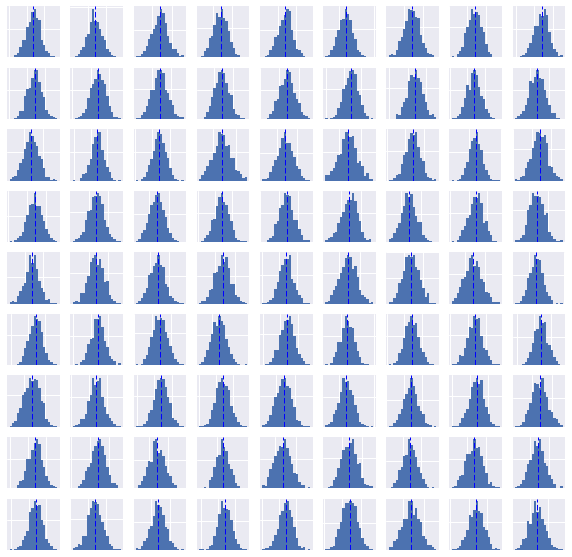

In [61]:
fig = plt.figure(figsize=(10, 10))
for i in range(1, 82):
    fig.add_subplot(9, 9, i)
    s = np.random.choice(sample_norm, 1000)
    plt.hist(s, bins=20, normed=True)
    plt.axvline(s.mean(), color='b', linestyle='dashed', linewidth=1)
    plt.tick_params(labelleft='off', labelbottom='off')
plt.show()

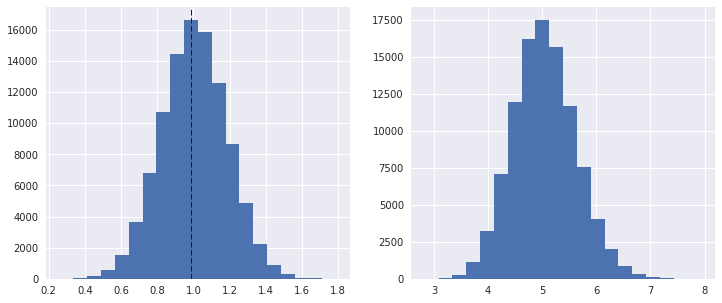

In [62]:
fig = plt.figure(figsize=(12, 5))
fig.add_subplot(121)
plt.axvline(s.mean(), color='b', linestyle='dashed', linewidth=1)
plt.hist(mean_list_norm, bins = 20)
fig.add_subplot(122)
plt.hist(mean_list_chi, bins = 20)
plt.show()

### Проверка гипотез

In [32]:
print("Среднее арифметическое: ", round(galton.Height.mean(), 2))
print("Медиана: ", galton.Height.median())

Среднее арифметическое:  66.76
Медиана:  66.5


In [16]:
def bimodal( low1, high1, mode1, low2, high2, mode2 ):
    toss = np.random.choice( (1, 2) )
    if toss == 1:
        return np.random.triangular( low1, high1, mode1 ) 
    else:
        return np.random.triangular( low2, high2, mode2 )
a = []
for x in range(1000):
    a.append(bimodal(1, 4, 4, 3, 6, 8))

In [17]:
a = []
for x in range(1000):
    a.append(bimodal(1, 4, 4, 3, 6, 8))

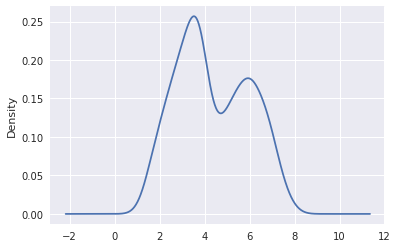

In [18]:
pd.Series(a).plot.kde()
plt.show()

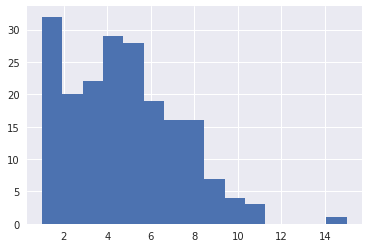

In [97]:
kids = []
for each in set(galton.Family):
    kids.append(int(galton[galton.Family==str(each)].Kids.values[0]))
plt.hist(kids, bins=15)
plt.show()

In [99]:
galton.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


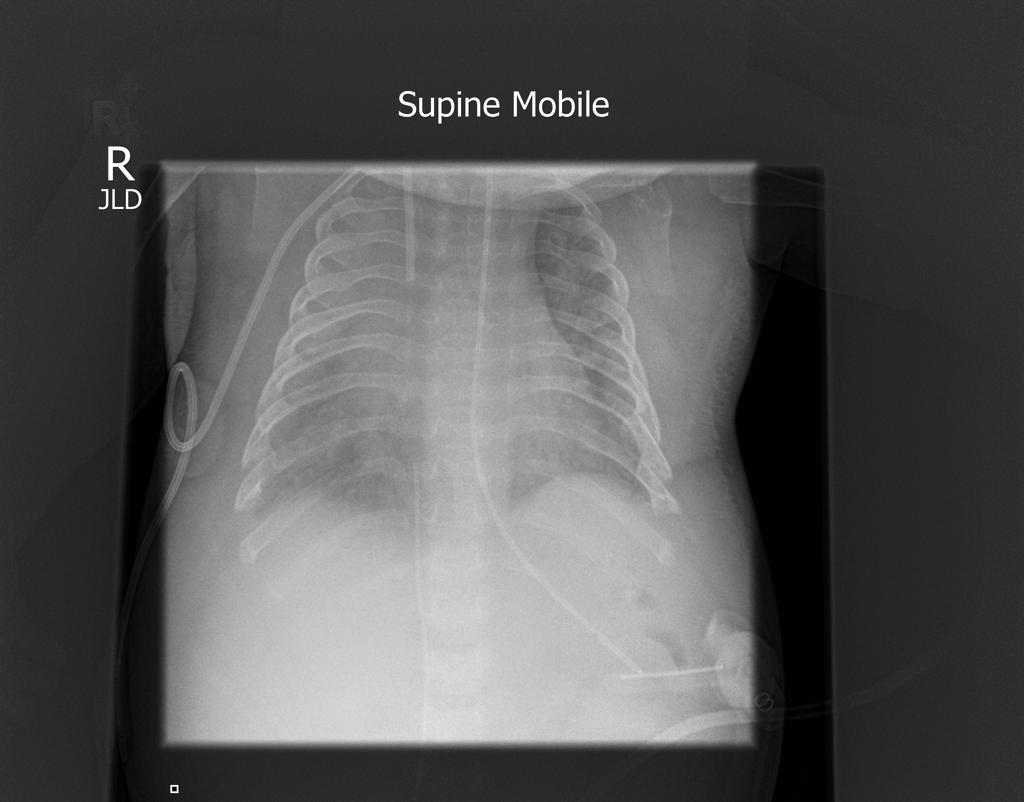

In [21]:
from IPython.display import Image
Image("image.jpg", width=400)

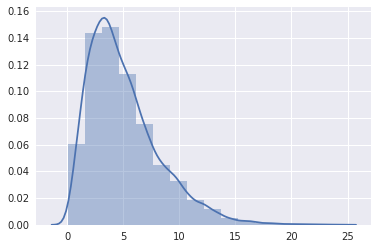

In [25]:
sns.distplot(sample_chi, bins=16)

In [26]:
mean_list_norm = np.array([np.mean(np.random.choice(sample_norm, 30)) for i in range(100000)])
mean_list_chi = [np.mean(np.random.choice(sample_chi, 30)) for i in range(100000)]

$
\begin{align*}
c = \sqrt{a^2 + b^2}
\end{align*}
$

In [58]:
%%javascript
//Этот блок нужен для построения оглавления
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>